<a href="https://colab.research.google.com/github/easonychang/HotShot-NBAEdition/blob/master/Early_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
import glob
import os
import re
import patsy
import statsmodels.api as sm
import seaborn as sns

In [30]:
# run only once when first on colabatory
# upload all the Shot Data - *.csv files locally
# check that you have the files by clicking on view -> table of contents -> files -> content

#from google.colab import files
#uploaded = files.upload()

# fp is a list that will store each year's shot data in order
FG = glob.glob('Shot Data - *.csv')

YEARs = [re.findall(r'Shot Data - ((\d+)-\d+).csv', s)[0] for s in FG]

YEARs

[]

In [31]:
# fp is a list that will store each year's shot data in order
FG = glob.glob('Shot Data - CSV/Shot Data - *.csv')
YEARs = [re.findall(r'Shot Data - ((\d+)-\d+).csv', s)[0] for s in FG]

YEARs


[('1996-1997', '1996'),
 ('1997-1998', '1997'),
 ('1998-1999', '1998'),
 ('1999-2000', '1999'),
 ('2000-2001', '2000'),
 ('2001-2002', '2001'),
 ('2002-2003', '2002'),
 ('2003-2004', '2003'),
 ('2004-2005', '2004'),
 ('2005-2006', '2005'),
 ('2006-2007', '2006'),
 ('2007-2008', '2007'),
 ('2008-2009', '2008'),
 ('2009-2010', '2009'),
 ('2010-2011', '2010'),
 ('2011-2012', '2011'),
 ('2012-2013', '2012'),
 ('2013-2014', '2013'),
 ('2014-2015', '2014'),
 ('2015-2016', '2015'),
 ('2016-2017', '2016'),
 ('2017-2018', '2017'),
 ('2018-2019', '2018')]

In [32]:
#loop through all years, adding each year's dataframe to the list
# now FG is a list of dataframes, length 23.
# Access each year in sequential order by indices 0 (1996 - 97) to 22 (2018 - 19).
FG = [pd.read_csv(fp, skiprows=1) for fp in FG]  # Skip first row, redundant information

In [33]:
YEARs[0][0]

'1996-1997'

In [34]:
for i in range(len(YEARs)):
    FG[i]['YEAR_SPAN'] = YEARs[i][0]  # Assign '1998-1999'
    FG[i]['YEAR'] = YEARs[i][1]  # Assign '1998'
    FG[i]['YEAR'] = FG[i]['YEAR'].astype(int)

In [35]:
df = pd.concat(FG, ignore_index=True)
# df = pd.concat(FG)
df

,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,FGM-T,FGA-T,FG%-T,YEAR_SPAN,YEAR
0,Atlanta Hawks,1372,2583,53.1,399,1044,38.2,646,1582,40.8,395,1084,36.4,1996-1997,1996
1,Boston Celtics,1732,3956,43.8,483,962,50.2,567,1209,46.9,284,836,34.0,1996-1997,1996
2,Charlotte Hornets,1457,3292,44.3,428,898,47.7,835,1568,53.3,268,578,46.4,1996-1997,1996
3,Chicago Bulls,1342,2483,54.0,809,1758,46.0,891,2006,44.4,235,673,34.9,1996-1997,1996
4,Cleveland Cavaliers,1261,2418,52.2,413,1019,40.5,847,2012,42.1,182,516,35.3,1996-1997,1996
5,Dallas Mavericks,1465,2757,53.1,507,1327,38.2,638,1743,36.6,201,610,33.0,1996-1997,1996
6,Denver Nuggets,1323,2550,51.9,531,1272,41.7,756,1960,38.6,323,895,36.1,1996-1997,1996
7,Detroit Pistons,1283,2319,55.3,582,1389,41.9,565,1349,41.9,397,1030,38.5,1996-1997,1996
8,Golden State Warriors,1534,2793,54.9,510,1258,40.5,751,1901,39.5,201,610,33.0,1996-1997,1996
9,Houston Rockets,1651,2892,57.1,486,1181,41.2,592,1586,37.3,306,808,37.9,1996-1997,1996


In [36]:
# teams change names

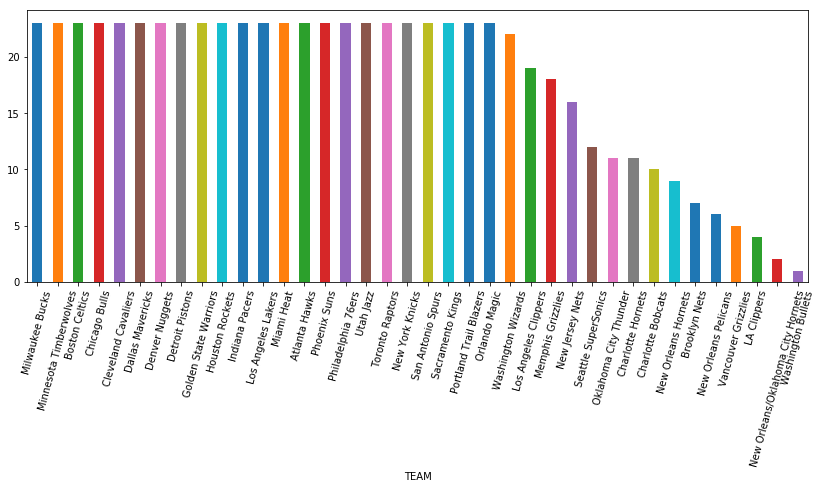

In [37]:
fig, ax = plt.subplots(0)
ax = df.groupby("TEAM")['YEAR'].nunique().sort_values(ascending=False).plot.bar(figsize=(14, 5))
plt.setp( ax.xaxis.get_majorticklabels(), rotation=75 )
plt.show()

In [38]:
def replace_team_name(name):
    if name == 'Seattle SuperSonics':
        return 'Oklahoma City Thunder'
    elif name == 'Charlotte Bobcats':
        return 'Charlotte Hornets'
    elif name == 'Vancouver Grizzlies':
        return 'Memphis Grizzlies'
    elif name == 'New Orleans Hornets' or name == 'New Orleans/Oklahoma City Hornets':
        return 'New Orleans Pelicans'
    elif name == 'Washington Bullets':
        return 'Washington Wizards'
    elif name == 'Los Angeles Clippers':
        return 'LA Clippers'
    elif name == 'New Jersey Nets':
        return 'Brooklyn Nets'
    return name

In [39]:
df['TEAM'] = df['TEAM'].apply(replace_team_name)

In [40]:
num_of_teams = df['TEAM'].unique()

assert len(num_of_teams) == 30

num_of_teams


array(['Atlanta Hawks', 'Boston Celtics', 'Charlotte Hornets',
       'Chicago Bulls', 'Cleveland Cavaliers', 'Dallas Mavericks',
       'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors',
       'Houston Rockets', 'Indiana Pacers', 'LA Clippers',
       'Los Angeles Lakers', 'Miami Heat', 'Milwaukee Bucks',
       'Minnesota Timberwolves', 'Brooklyn Nets', 'New York Knicks',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Oklahoma City Thunder', 'Toronto Raptors', 'Utah Jazz',
       'Memphis Grizzlies', 'Washington Wizards', 'New Orleans Pelicans'],
      dtype=object)

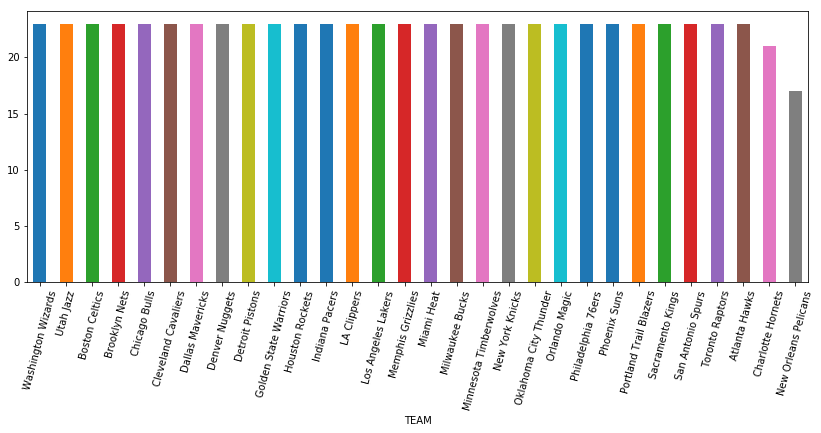

In [41]:
fig, ax = plt.subplots(0)
ax = df.groupby("TEAM")['YEAR'].nunique().sort_values(ascending=False).plot.bar(figsize=(14, 5))
plt.setp( ax.xaxis.get_majorticklabels(), rotation=75 )
plt.show()

In [42]:
def average_shooting_dist(s):
    sum_all_distances = 1 * s['FGA-C'] + 2 * s['FGA-M'] + 3 * s['FGA-L'] + 4 * s['FGA-T']
    num_of_attempts = s['FGA-C'] + s['FGA-M'] + s['FGA-L'] + s['FGA-T']
    return sum_all_distances / num_of_attempts

In [43]:
df['avg_shot_dist'] = df.apply(average_shooting_dist, axis=1)

In [44]:
def custom_split(s):
  return s.split('-')[0]

df['TEAM-YEAR'] = df.TEAM + '-' + df.YEAR_SPAN.apply(custom_split)


In [45]:
df

,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,FGM-T,FGA-T,FG%-T,YEAR_SPAN,YEAR,avg_shot_dist,TEAM-YEAR
0,Atlanta Hawks,1372,2583,53.1,399,1044,38.2,646,1582,40.8,395,1084,36.4,1996-1997,1996,2.185444,Atlanta Hawks-1996
1,Boston Celtics,1732,3956,43.8,483,962,50.2,567,1209,46.9,284,836,34.0,1996-1997,1996,1.845613,Boston Celtics-1996
2,Charlotte Hornets,1457,3292,44.3,428,898,47.7,835,1568,53.3,268,578,46.4,1996-1997,1996,1.910354,Charlotte Hornets-1996
3,Chicago Bulls,1342,2483,54.0,809,1758,46.0,891,2006,44.4,235,673,34.9,1996-1997,1996,2.125578,Chicago Bulls-1996
4,Cleveland Cavaliers,1261,2418,52.2,413,1019,40.5,847,2012,42.1,182,516,35.3,1996-1997,1996,2.104946,Cleveland Cavaliers-1996
5,Dallas Mavericks,1465,2757,53.1,507,1327,38.2,638,1743,36.6,201,610,33.0,1996-1997,1996,2.032002,Dallas Mavericks-1996
6,Denver Nuggets,1323,2550,51.9,531,1272,41.7,756,1960,38.6,323,895,36.1,1996-1997,1996,2.179721,Denver Nuggets-1996
7,Detroit Pistons,1283,2319,55.3,582,1389,41.9,565,1349,41.9,397,1030,38.5,1996-1997,1996,2.179070,Detroit Pistons-1996
8,Golden State Warriors,1534,2793,54.9,510,1258,40.5,751,1901,39.5,201,610,33.0,1996-1997,1996,2.049985,Golden State Warriors-1996
9,Houston Rockets,1651,2892,57.1,486,1181,41.2,592,1586,37.3,306,808,37.9,1996-1997,1996,2.047936,Houston Rockets-1996


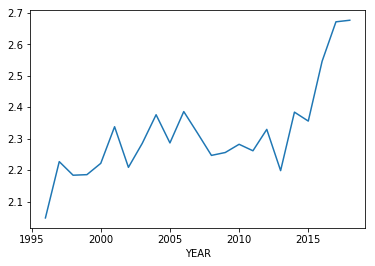

In [46]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['avg_shot_dist'])
a['Houston Rockets'].plot()

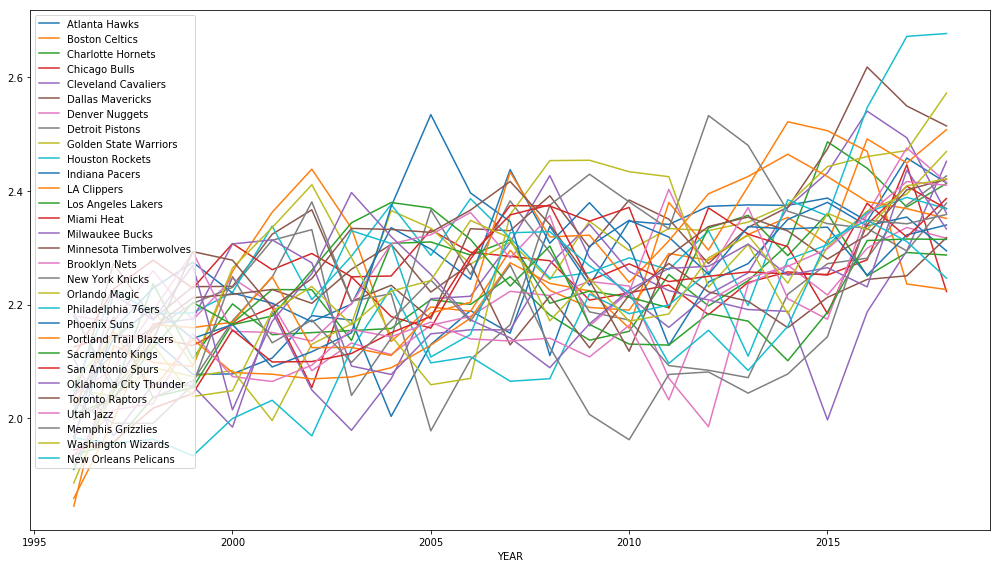

In [47]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['avg_shot_dist'])
j = 0
for team in df.TEAM.unique():
    a.loc[team].plot(figsize=(14,8), label=team)
    j += 1
#     if j == 20: break

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

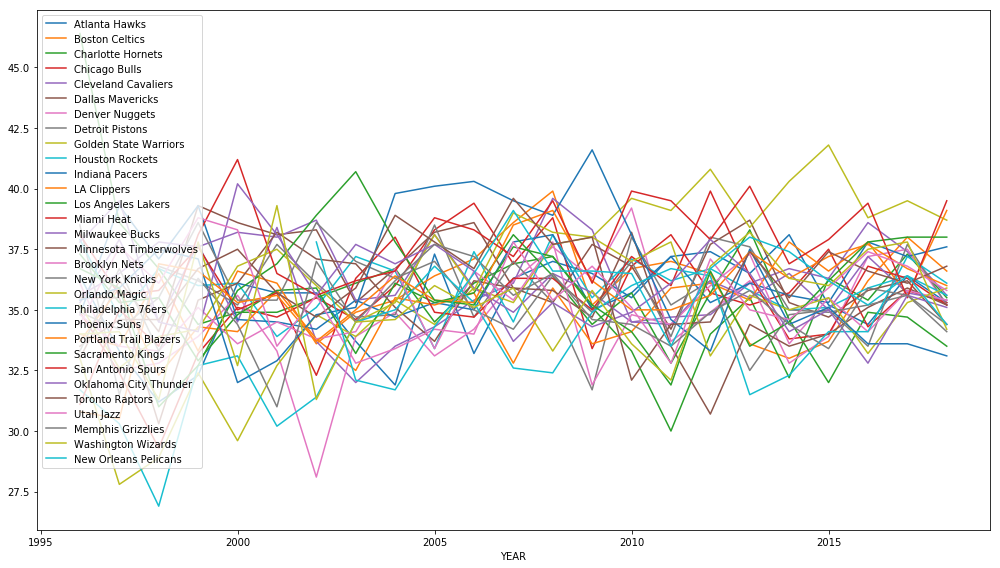

In [48]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['FG%-T'])

# fig, ax = plt.subplots(0)
# plt.
j = 0
for team in df.TEAM.unique():
    a.loc[team].plot(figsize=(14,8), label=team)
    j += 1
#     if j == 20: break

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

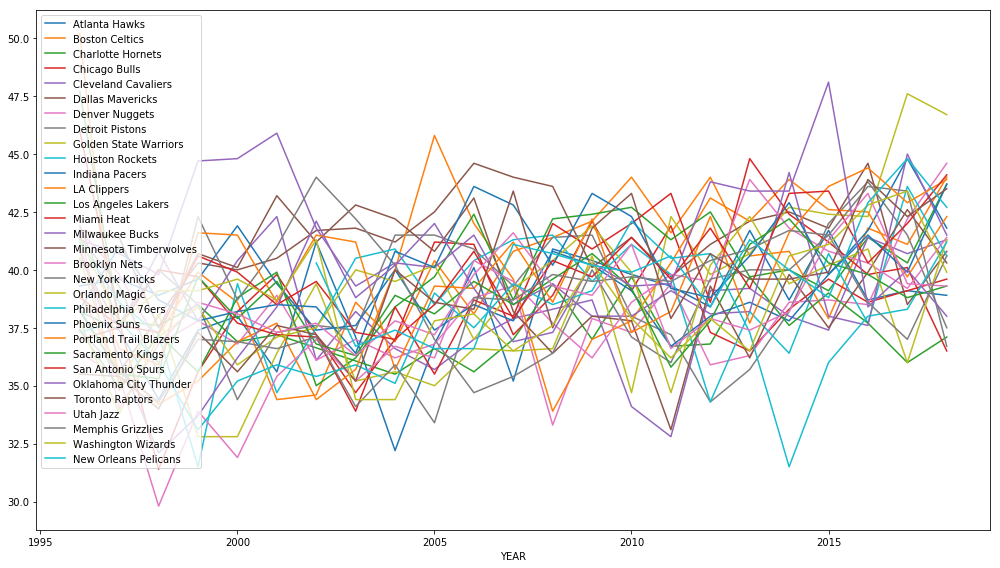

In [49]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['FG%-M'])

# fig, ax = plt.subplots(0)
# plt.
j = 0
for team in df.TEAM.unique():
    a.loc[team].plot(figsize=(14,8), label=team)
    j += 1
#     if j == 20: break

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

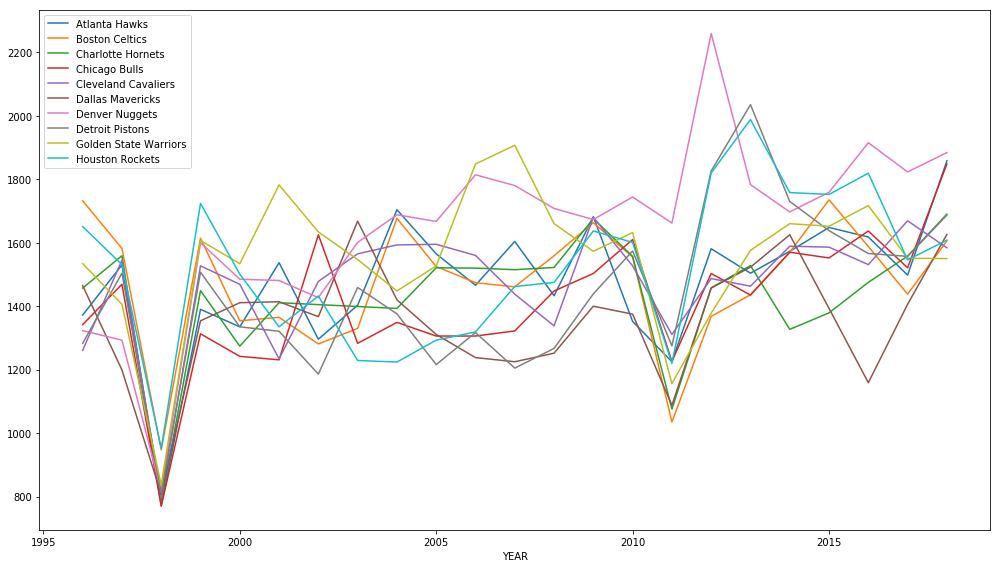

In [50]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['FGM-C'])

# fig, ax = plt.subplots(0)
# plt.
j = 0
for team in df.TEAM.unique():
    a.loc[team].plot(figsize=(14,8), label=team)
    j += 1
    if j == 10: break

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [51]:
#test2019 = pd.read_csv('Shot Data - CSV/Shot Data - 2018-2019.csv')
#test2019 = pd.read_csv('Shot Data - 2018-2019.csv')
#test2019.head()

# Shot Distance Percentage Chart

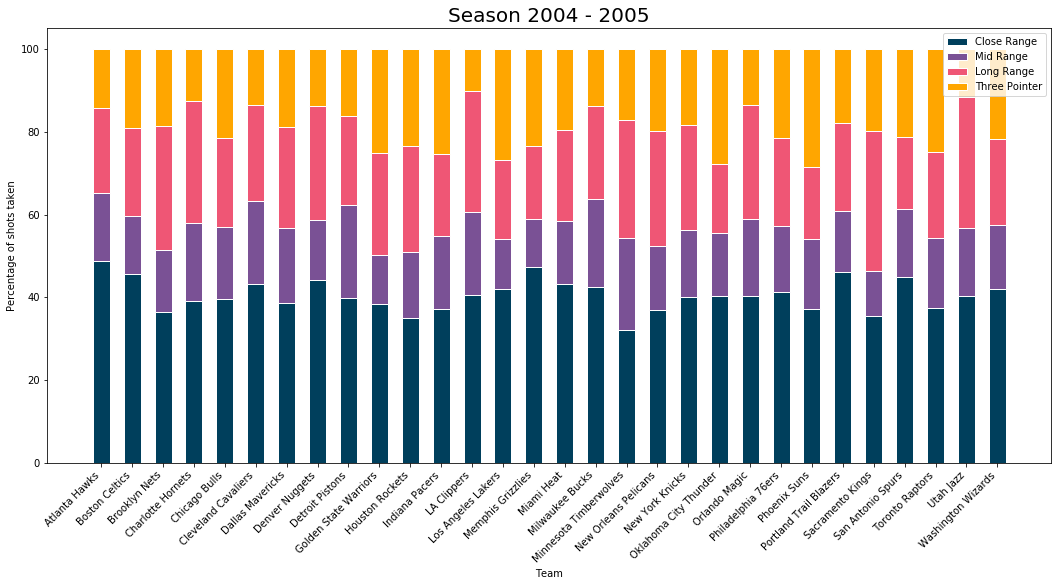

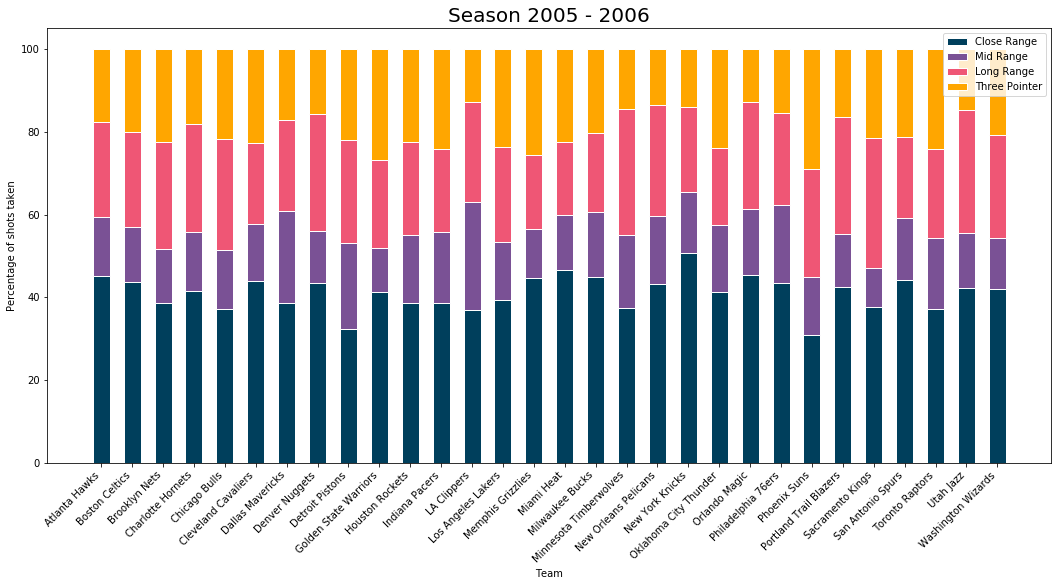

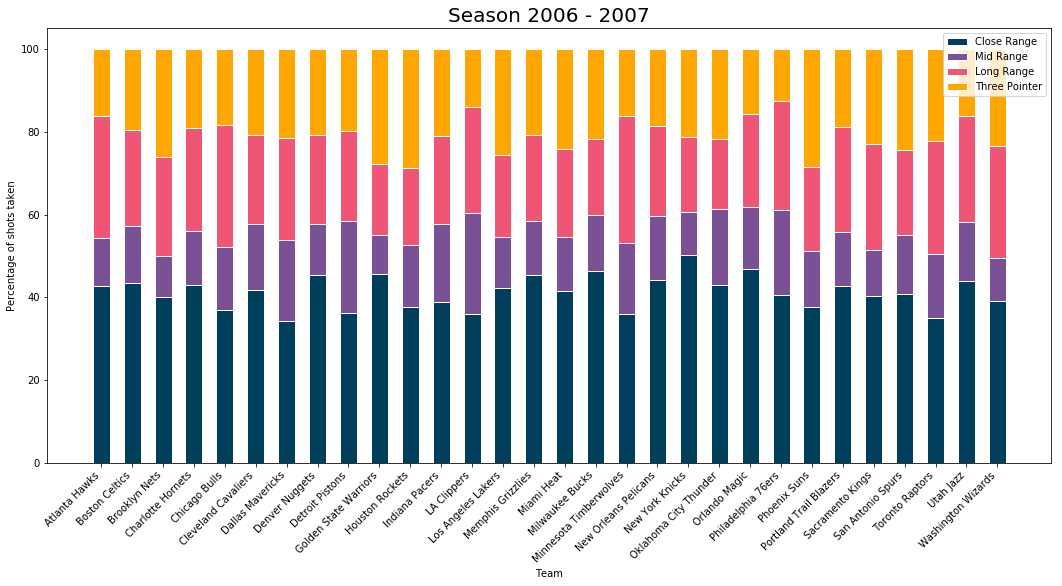

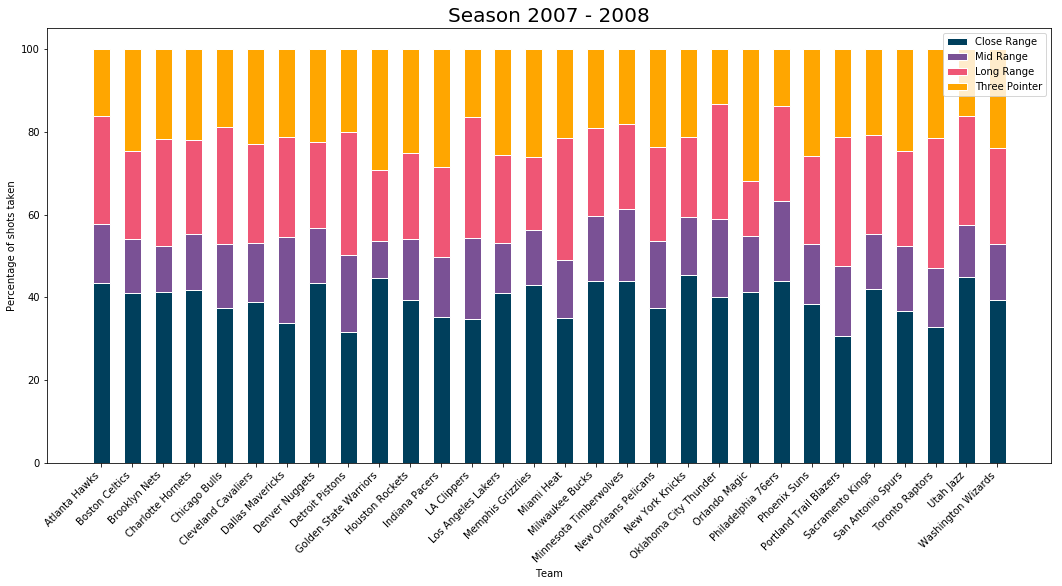

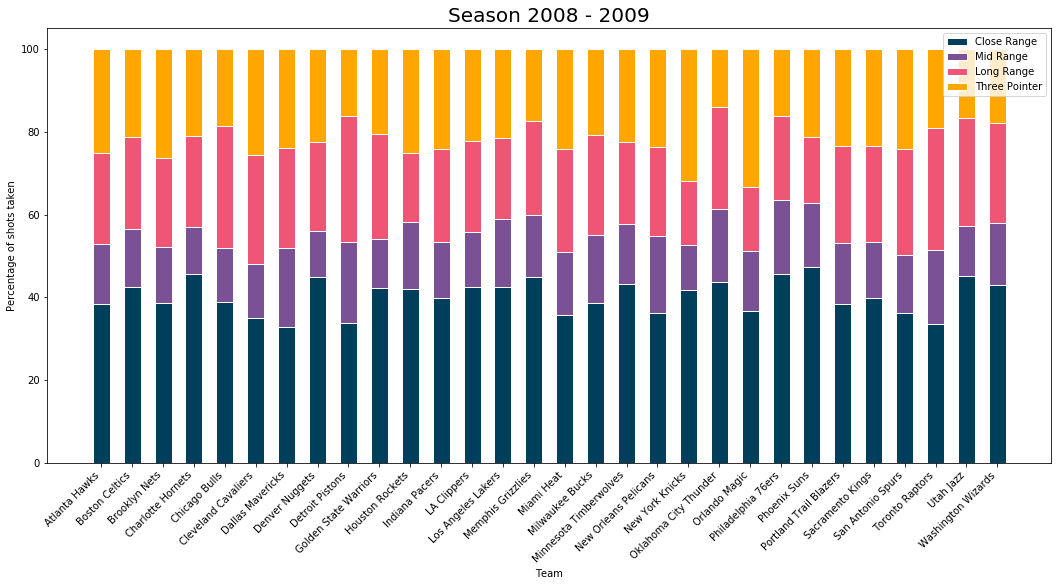

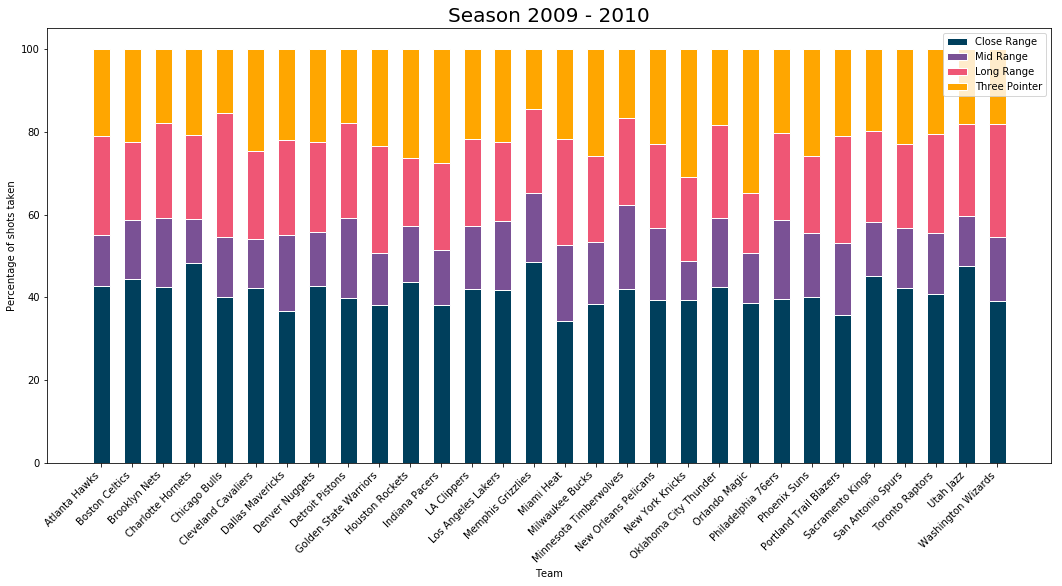

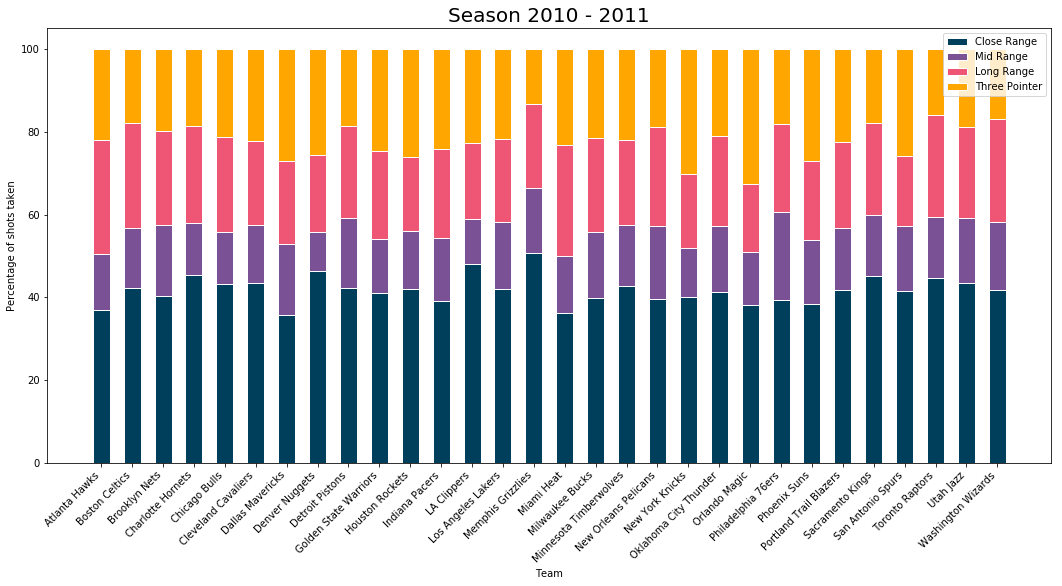

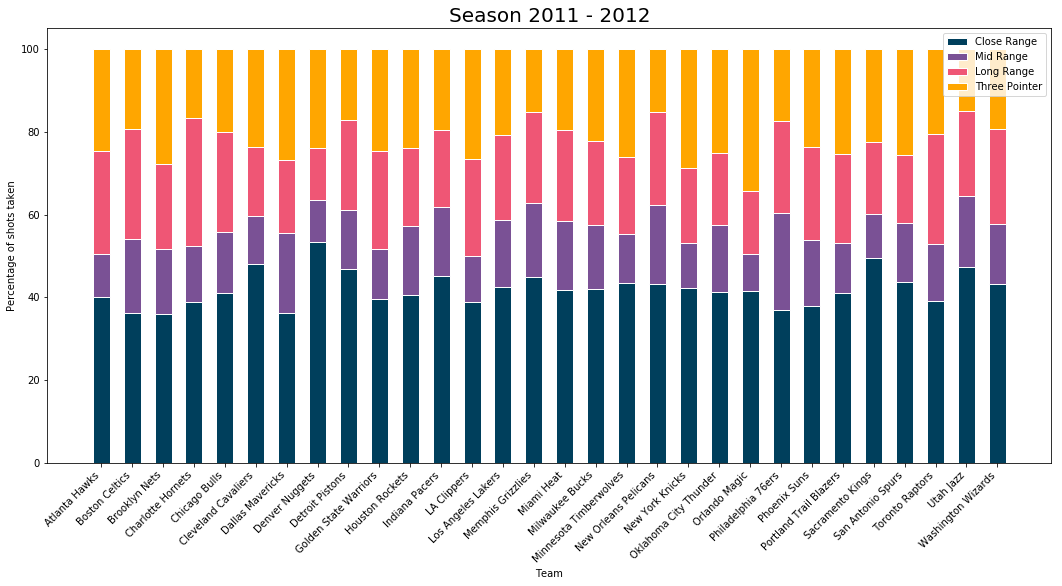

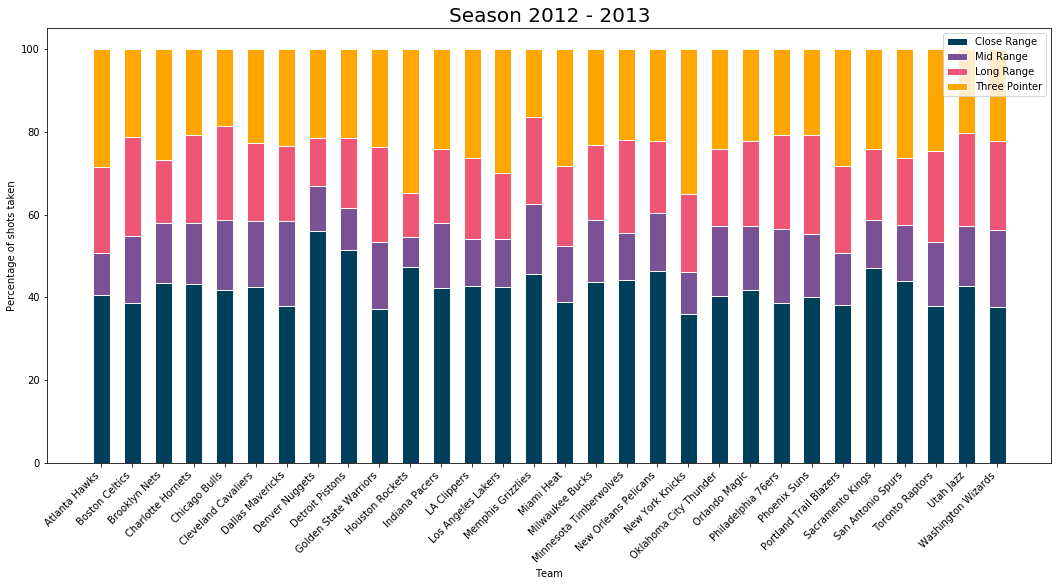

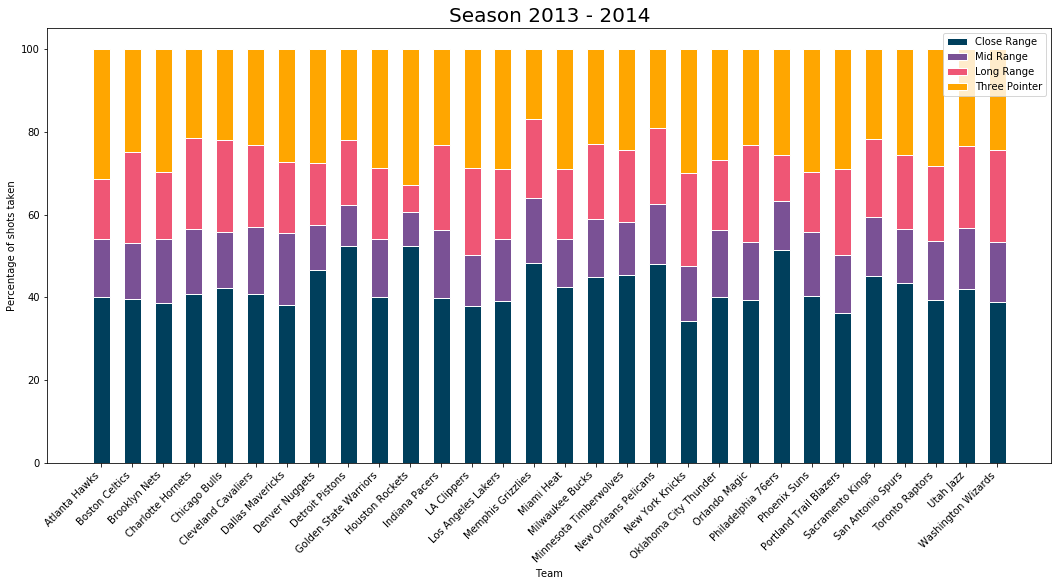

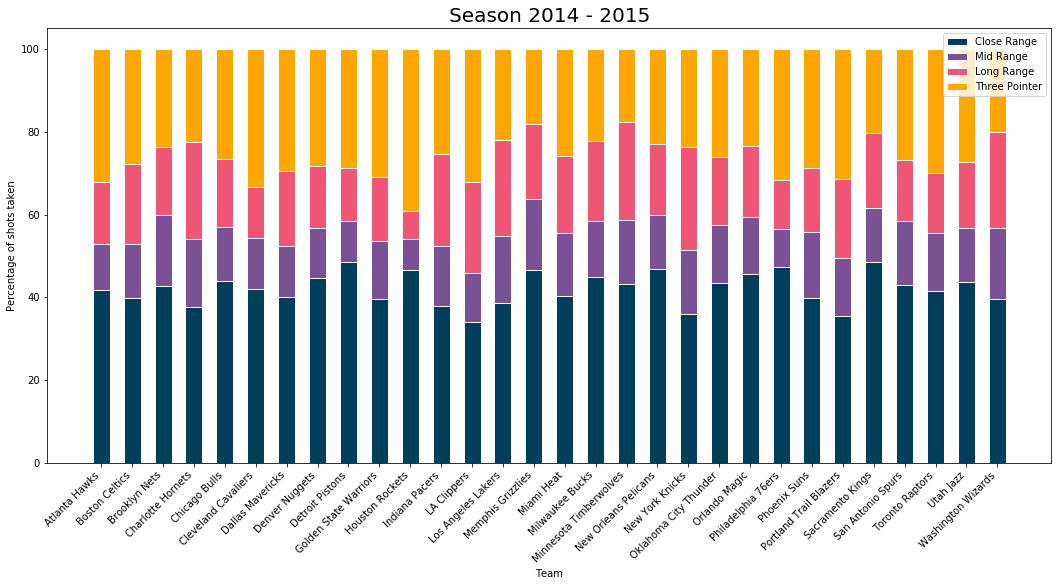

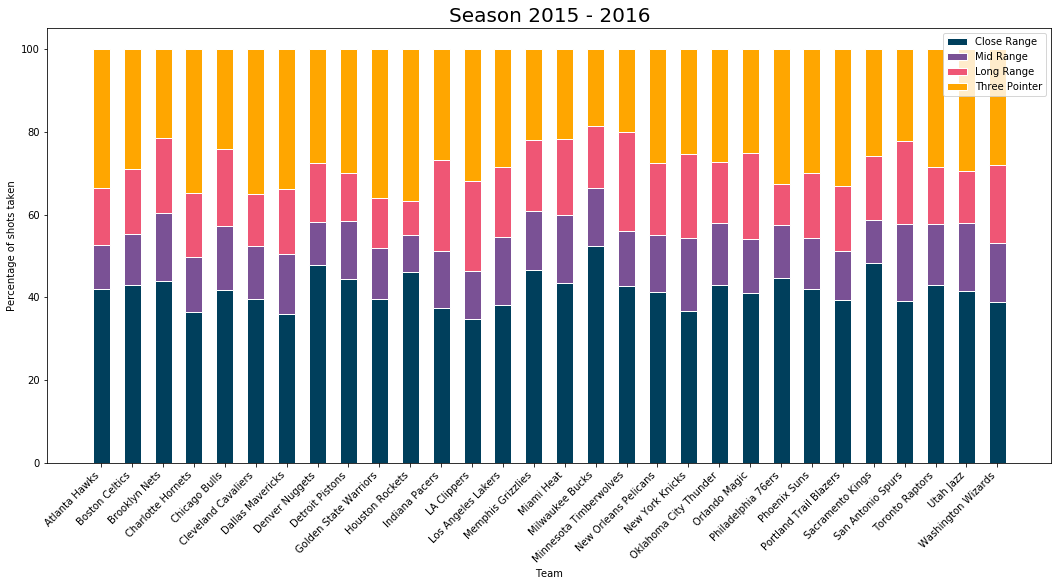

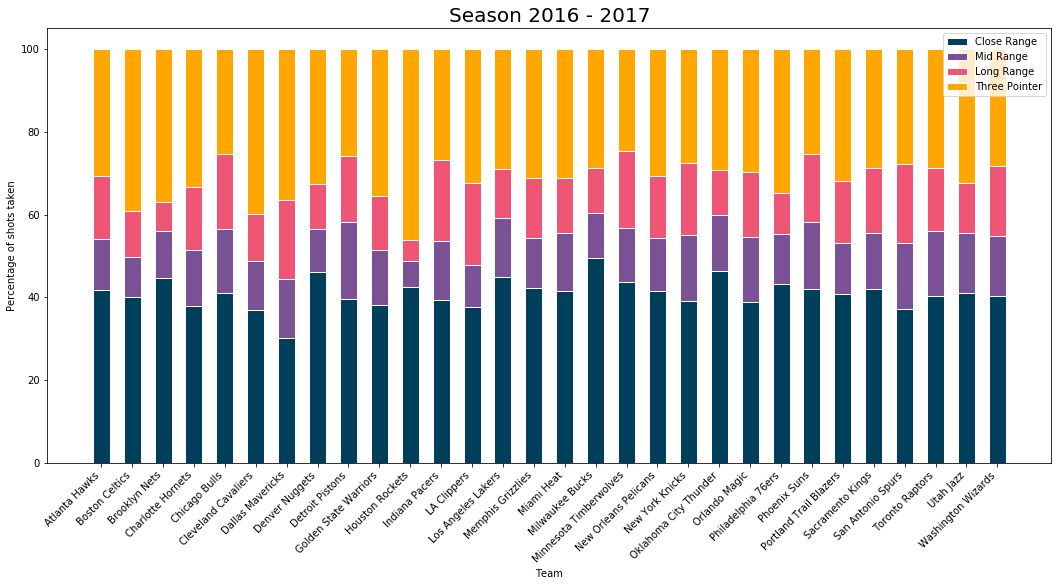

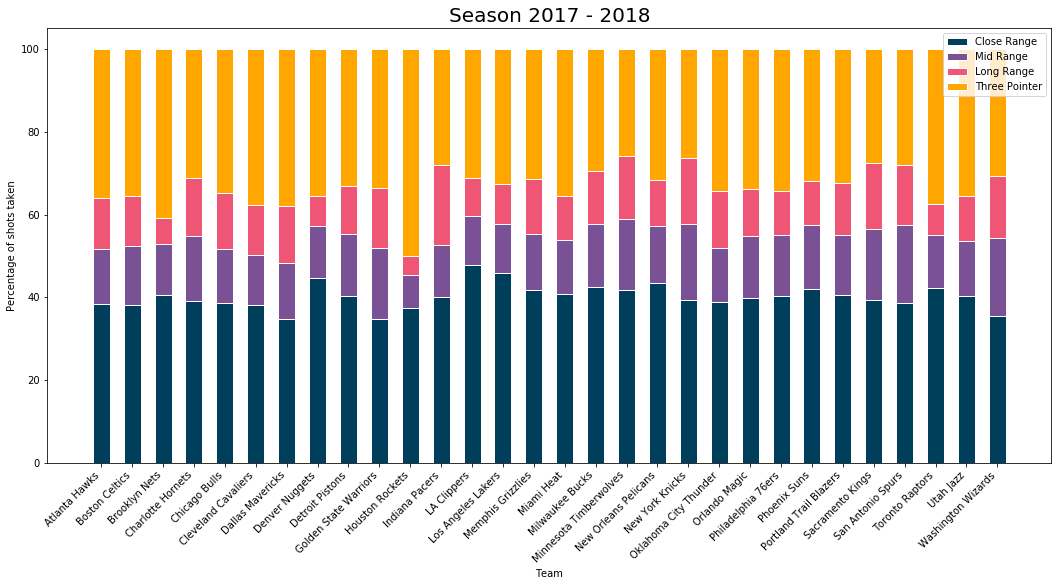

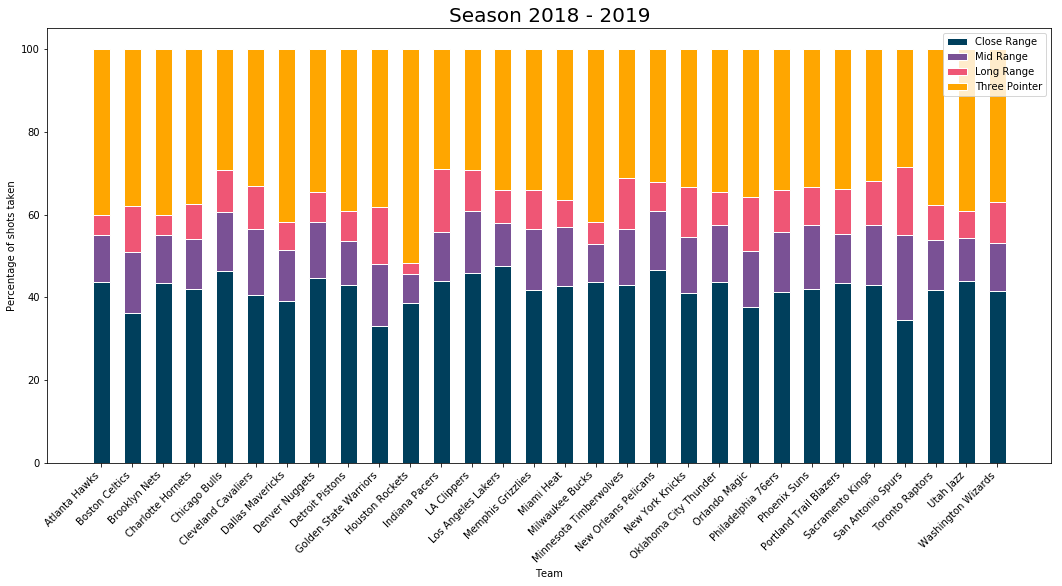

In [52]:

a = df.groupby('YEAR').apply(lambda df_: df_.set_index('TEAM', drop=True).sort_index())

# excluded some years because there were less than 30 teams, and it gives an error
for year in range(2004, 2019):

  # Create a figure with a single subplot
  f, ax = plt.subplots(1, figsize=(18,8))


  # Create the total Field Goal Attempted by each team 
  totals = [i+j+k+l for i,j,k,l in zip(a.loc[year]['FGA-C'], a.loc[year]['FGA-M'], a.loc[year]['FGA-L'], a.loc[year]['FGA-T'])]

  # Create the percentage of the close range shot attempts ove total shot attempts
  close = [i / j * 100 for  i,j in zip(a.loc[year]['FGA-C'], totals)]

  # Create the percentage of the mid range shot attempts ove total shot attempts
  mid = [i / j * 100 for  i,j in zip(a.loc[year]['FGA-M'], totals)]

  # Create the percentage of the long range shot attempts ove total shot attempts
  long = [i / j * 100 for  i,j in zip(a.loc[year]['FGA-L'], totals)]

  # Create the percentage of the three point shot attempts ove total shot attempts
  threes = [i / j * 100 for  i,j in zip(a.loc[year]['FGA-T'], totals)]

  team = a.loc[2018].index
  
  barWidth = 0.55

  p1 = plt.bar(team, close, color='#003f5c', edgecolor='white', width=barWidth)

  p2 = plt.bar(team, mid, bottom=close, color='#7a5195', edgecolor='white', width=barWidth)

  p3 = plt.bar(team, long, bottom=[i+j for i,j in zip(close, mid)], color='#ef5675', edgecolor='white', width=barWidth)

  p4 = plt.bar(team, threes, bottom=[i+j+k for i,j,k in zip(close, mid, long)], color='#ffa600', edgecolor='white', width=barWidth)
  
  plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
  
  plt.title('Season ' + str(year) + ' - ' + str(year+1) , fontsize=20)
  plt.xlabel('Team')
  plt.ylabel('Percentage of shots taken')
  plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Close Range', 'Mid Range', 'Long Range', 'Three Pointer'))

  plt.show()


In [53]:
a = df.groupby('YEAR').apply(lambda df_: df_.set_index('TEAM', drop=True).sort_index())

# Total Shots Attempted
a['TSA'] = a['FGA-C'] + a['FGA-M'] + a['FGA-L'] + a['FGA-T']

# Percentage of Close Range / Total
a['%CA/T'] = a['FGA-C'] / a['TSA']
# Percentage of Mid Range / Total
a['%MA/T'] = a['FGA-M'] / a['TSA']
# Percentage of Long Range / Total
a['%LA/T'] = a['FGA-L'] / a['TSA']
# Percentage of Threes / Total
a['%TA/T'] = a['FGA-T'] / a['TSA']

a

FGM-C  FGA-C  FG%-C  FGM-M  FGA-M  FG%-M  FGM-L  \
YEAR TEAM                                                                      
1996 Atlanta Hawks            1372   2583   53.1    399   1044   38.2    646   
     Boston Celtics           1732   3956   43.8    483    962   50.2    567   
     Brooklyn Nets            1479   3023   48.9    554   1520   36.4    690   
     Charlotte Hornets        1457   3292   44.3    428    898   47.7    835   
     Chicago Bulls            1342   2483   54.0    809   1758   46.0    891   
     Cleveland Cavaliers      1261   2418   52.2    413   1019   40.5    847   
     Dallas Mavericks         1465   2757   53.1    507   1327   38.2    638   
     Denver Nuggets           1323   2550   51.9    531   1272   41.7    756   
     Detroit Pistons          1283   2319   55.3    582   1389   41.9    565   
     Golden State Warriors    1534   2793   54.9    510   1258   40.5    751   
     Houston Rockets          1651   2892   57.1    486   1181   41.2    592   
     Indiana Pacers           1490   2826   52.7    541   1378   39.3    615   
     LA Clippers              1571   2971   52.9    494   1266   39.0    697   
     Los Angeles Lakers       1803   3406   52.9    421   1127   37.4    465   
     Memphis Grizzlies        1499   2802   53.5    499   1335   37.4    592   
     Miami Heat               1439   2666   54.0    412   1114   37.0    627   
     Milwaukee Bucks          1550   2864   54.1    702   1700   41.3    493   
     Minnesota Timberwolves   1430   2680   53.4    549   1318   41.7    769   
     New York Knicks          1487   2757   53.9    523   1263   41.4    650   
     Oklahoma City Thunder    1809   3283   55.1    328    804   40.8    590   
     Orlando Magic            1523   2885   52.8    394   1042   37.8    661   
     Philadelphia 76ers       1748   3370   51.9    468   1254   37.3    495   
     Phoenix Suns             1686   2906   58.0    522   1363   38.3    745   
     Portland Trail Blazers   1765   3307   53.4    487   1190   40.9    612   
     Sacramento Kings         1503   2846   52.8    498   1301   38.3    837   
     San Antonio Spurs        1611   3156   51.0    385    992   38.8    657   
     Toronto Raptors          1573   3047   51.6    429   1209   35.5    667   
     Utah Jazz                1730   2929   59.1    489   1173   41.7    770   
     Washington Wizards       1842   3241   56.8    670   1618   41.4    466   
1997 Atlanta Hawks            1530   2803   54.6    533   1424   37.4    490   
...                            ...    ...    ...    ...    ...    ...    ...   
2018 Atlanta Hawks            1858   3275   56.7    334    859   38.9    136   
     Boston Celtics           1606   2687   59.8    484   1100   44.0    329   
     Brooklyn Nets            1773   3197   55.5    349    843   41.4    138   
     Charlotte Hornets        1690   3081   54.9    386    883   43.7    244   
     Chicago Bulls            1848   3331   55.5    408   1031   39.6    267   
     Cleveland Cavaliers      1584   2914   54.4    468   1133   41.3    291   
     Dallas Mavericks         1626   2768   58.7    361    884   40.8    173   
     Denver Nuggets           1884   3288   57.3    447   1003   44.6    211   
     Detroit Pistons          1687   3099   54.4    285    759   37.5    221   
     Golden State Warriors    1550   2428   63.8    511   1094   46.7    464   
     Houston Rockets          1608   2756   58.3    207    510   40.6     82   
     Indiana Pacers           1810   3124   57.9    353    845   41.8    449   
     LA Clippers              1834   3278   55.9    456   1077   42.3    275   
     Los Angeles Lakers       2110   3522   59.9    285    768   37.1    249   
     Memphis Grizzlies        1633   2888   56.5    410   1009   40.6    260   
     Miami Heat               1784   3081   57.9    372   1018   36.5    167   
     Milwaukee Bucks          2018   3270   61.7    279    672   41.5    153   
     Minnesota Timberwolves  

# Winning Data

In [54]:
def standarize_team_name(name):
  out = name.split('(')[0]
  out = out.replace('*', '')
  out = out.strip()
  
  return out


In [55]:
big_df = []

division = ['Atlantic Division', 'Central Division', 'Northwest Division', 'Southeast Division', 'Southwest Division', 'Pacific Division', 'Midwest Division']


for year in range(1997, 2020):
  nba_year = 'https://www.basketball-reference.com/leagues/NBA_'+ str(year) + '_standings.html'
  data = pd.read_html(nba_year)

  data = data[:2]

  data[0] = data[0].rename(index=str, columns={"Eastern Conference": "TEAM"})
  data[1] = data[1].rename(index=str, columns={"Western Conference": "TEAM"})

  df_data = pd.concat(data, sort=False)

  df_data['TEAM'] = df_data['TEAM'].apply(standarize_team_name)

  df_data = df_data.drop(columns = ['GB', 'SRS'])

  for div in division:
    df_data = df_data[df_data.TEAM != div]

  df_data['YEAR_SPAN'] = str(year - 1) + '-' + str(year)
  df_data['YEAR'] = str(year - 1)
  big_df.append(df_data)

  
  
big_df = pd.concat(big_df, sort=False)

In [56]:
big_df['TEAM'] = big_df['TEAM'].apply(replace_team_name)
big_df['TEAM-YEAR'] = big_df['TEAM'] + '-' + big_df['YEAR']

big_df

,TEAM,W,L,W/L%,PS/G,PA/G,YEAR_SPAN,YEAR,TEAM-YEAR
1,Miami Heat,61.0,21.0,0.744,94.8,89.3,1996-1997,1996,Miami Heat-1996
2,New York Knicks,57.0,25.0,0.695,95.4,92.2,1996-1997,1996,New York Knicks-1996
3,Orlando Magic,45.0,37.0,0.549,94.1,94.5,1996-1997,1996,Orlando Magic-1996
4,Washington Wizards,44.0,38.0,0.537,99.4,97.7,1996-1997,1996,Washington Wizards-1996
5,Brooklyn Nets,26.0,56.0,0.317,97.2,101.8,1996-1997,1996,Brooklyn Nets-1996
6,Philadelphia 76ers,22.0,60.0,0.268,100.2,106.7,1996-1997,1996,Philadelphia 76ers-1996
7,Boston Celtics,15.0,67.0,0.183,100.6,107.9,1996-1997,1996,Boston Celtics-1996
9,Chicago Bulls,69.0,13.0,0.841,103.1,92.3,1996-1997,1996,Chicago Bulls-1996
10,Atlanta Hawks,56.0,26.0,0.683,94.8,89.4,1996-1997,1996,Atlanta Hawks-1996
11,Detroit Pistons,54.0,28.0,0.659,94.2,88.9,1996-1997,1996,Detroit Pistons-1996


In [57]:

big_df = big_df.drop(columns = ['TEAM', 'YEAR_SPAN', 'YEAR'])
big_df

,W,L,W/L%,PS/G,PA/G,TEAM-YEAR
1,61.0,21.0,0.744,94.8,89.3,Miami Heat-1996
2,57.0,25.0,0.695,95.4,92.2,New York Knicks-1996
3,45.0,37.0,0.549,94.1,94.5,Orlando Magic-1996
4,44.0,38.0,0.537,99.4,97.7,Washington Wizards-1996
5,26.0,56.0,0.317,97.2,101.8,Brooklyn Nets-1996
6,22.0,60.0,0.268,100.2,106.7,Philadelphia 76ers-1996
7,15.0,67.0,0.183,100.6,107.9,Boston Celtics-1996
9,69.0,13.0,0.841,103.1,92.3,Chicago Bulls-1996
10,56.0,26.0,0.683,94.8,89.4,Atlanta Hawks-1996
11,54.0,28.0,0.659,94.2,88.9,Detroit Pistons-1996


In [58]:
final_df = pd.merge(df, big_df, on='TEAM-YEAR', copy=False)
final_df

# Season 1998-1999 played 50 games, Season 2011-2012 played 66 games instead of 82 because of lock out!

,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,...,FG%-T,YEAR_SPAN,YEAR,avg_shot_dist,TEAM-YEAR,W,L,W/L%,PS/G,PA/G
0,Atlanta Hawks,1372,2583,53.1,399,1044,38.2,646,1582,40.8,...,36.4,1996-1997,1996,2.185444,Atlanta Hawks-1996,56.0,26.0,0.683,94.8,89.4
1,Boston Celtics,1732,3956,43.8,483,962,50.2,567,1209,46.9,...,34.0,1996-1997,1996,1.845613,Boston Celtics-1996,15.0,67.0,0.183,100.6,107.9
2,Charlotte Hornets,1457,3292,44.3,428,898,47.7,835,1568,53.3,...,46.4,1996-1997,1996,1.910354,Charlotte Hornets-1996,54.0,28.0,0.659,98.9,97.0
3,Chicago Bulls,1342,2483,54.0,809,1758,46.0,891,2006,44.4,...,34.9,1996-1997,1996,2.125578,Chicago Bulls-1996,69.0,13.0,0.841,103.1,92.3
4,Cleveland Cavaliers,1261,2418,52.2,413,1019,40.5,847,2012,42.1,...,35.3,1996-1997,1996,2.104946,Cleveland Cavaliers-1996,42.0,40.0,0.512,87.5,85.6
5,Dallas Mavericks,1465,2757,53.1,507,1327,38.2,638,1743,36.6,...,33.0,1996-1997,1996,2.032002,Dallas Mavericks-1996,24.0,58.0,0.293,90.6,97.0
6,Denver Nuggets,1323,2550,51.9,531,1272,41.7,756,1960,38.6,...,36.1,1996-1997,1996,2.179721,Denver Nuggets-1996,21.0,61.0,0.256,97.8,104.1
7,Detroit Pistons,1283,2319,55.3,582,1389,41.9,565,1349,41.9,...,38.5,1996-1997,1996,2.179070,Detroit Pistons-1996,54.0,28.0,0.659,94.2,88.9
8,Golden State Warriors,1534,2793,54.9,510,1258,40.5,751,1901,39.5,...,33.0,1996-1997,1996,2.049985,Golden State Warriors-1996,30.0,52.0,0.366,99.6,104.4
9,Houston Rockets,1651,2892,57.1,486,1181,41.2,592,1586,37.3,...,37.9,1996-1997,1996,2.047936,Houston Rockets-1996,57.0,25.0,0.695,100.6,96.1


In [59]:
#get just the Hawks data for every year
df_hawks = final_df[final_df['TEAM'] == 'Atlanta Hawks']
df_hawks = df_hawks.set_index(np.arange(df_hawks.shape[0]))

team_dfs = []
for i in range(0,3):
    teams_list = final_df['TEAM'].unique().tolist()
    index = random.randint(0, len(teams_list) - 1)
    team_name = teams_list[index]
    team_dfs.append(final_df[final_df['TEAM'] == team_name])
#team_dfs a list of 3 random team dataframes we will plot

for i, team in enumerate(team_dfs):
    team_dfs[i] = team.set_index(np.arange(team.shape[0]))

$ \text{Now create a list of percent shot change } \Delta S = \{\Delta S_{0}, \Delta S_{1}, ..., \Delta S_{i}, ..., \Delta S_{n}\} \text{ by year for all n years.}\\
\Delta S_{i} = \frac{S_{i} - S_{i-1}}{S_{i-1}} \\ \text{i.e. } \Delta S \text{ will span years 1997-2018.}$

In [60]:
#First for attempted field goals FGA-T
delS_A = []
for year in range(1,23):
    del_Si = (df_hawks.loc[year]['FGA-T'] - df_hawks.loc[year-1]['FGA-T'])/(df_hawks.loc[year-1]['FGA-T'])
    delS_A.append(del_Si)
#insert dummy 0 at start of list to represent the fact that year 1996 is our baseline
delS_A.insert(0,0)
df_hawks['dFGA-T'] = delS_A

for i, team in enumerate(team_dfs):
    delS_A = []
    for year in range(1,23):
        del_Si = (team.loc[year]['FGA-T'] - team.loc[year-1]['FGA-T'])/(team.loc[year-1]['FGA-T'])
        delS_A.append(del_Si)
    #insert dummy 0 at start of list to represent the fact that year 1996 is our baseline
    delS_A.insert(0,0)
    team_dfs[i]['dFGA-T'] = delS_A

Now, plot the new differential data across years

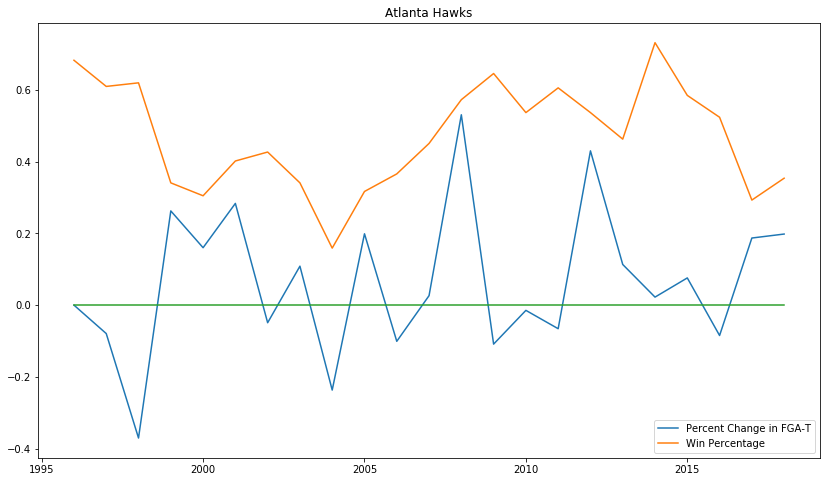

In [61]:
plt.figure(figsize=(14,8))
plt.plot(df_hawks['YEAR'], df_hawks['dFGA-T'], label='Percent Change in FGA-T')
plt.plot(df_hawks['YEAR'], df_hawks['W/L%'], label = 'Win Percentage')
plt.plot(df_hawks['YEAR'], [0]*23)
plt.title('Atlanta Hawks')
plt.legend()
plt.show()

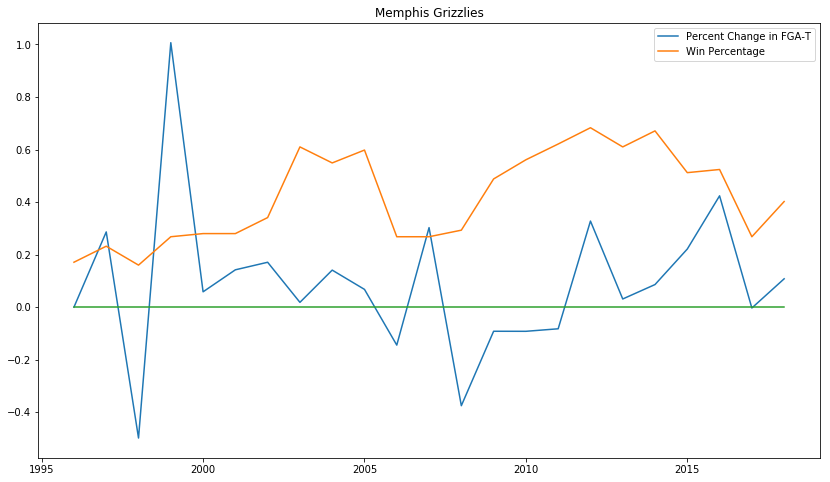

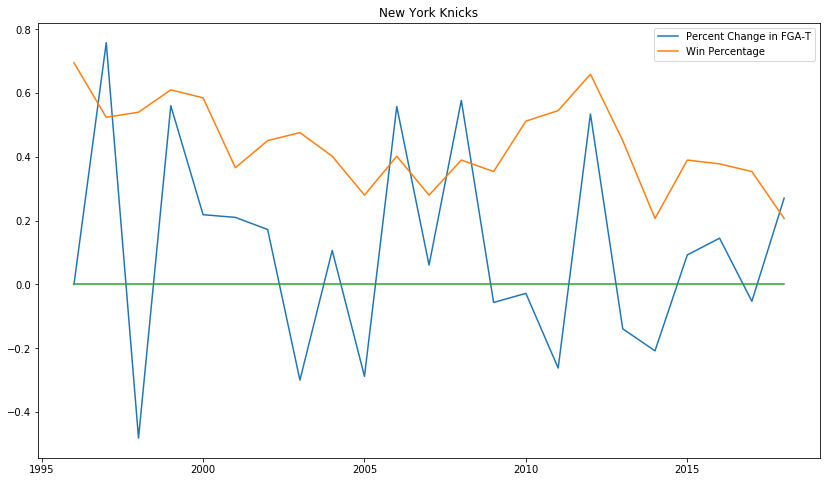

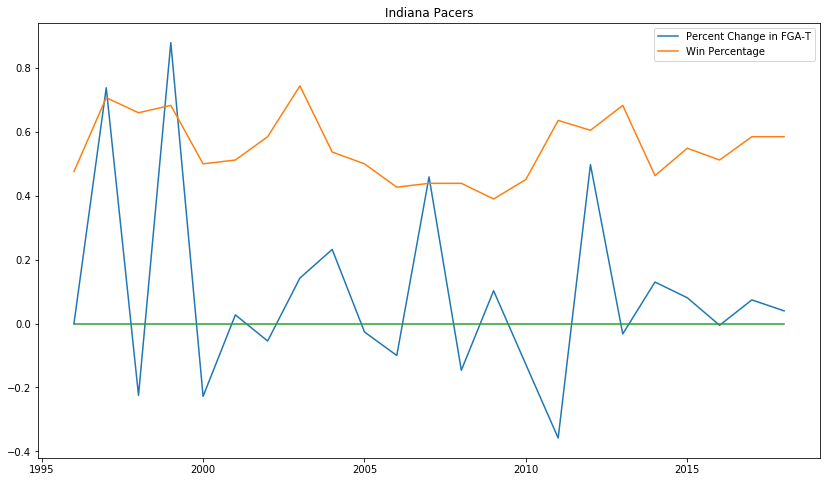

In [62]:
for team in team_dfs:
    plt.figure(figsize=(14,8))
    plt.plot(team['YEAR'], team['dFGA-T'], label='Percent Change in FGA-T')
    plt.plot(team['YEAR'], team['W/L%'], label = 'Win Percentage')
    plt.plot(team['YEAR'], [0]*23)
    plt.title(team.loc[0]['TEAM'])
    plt.legend()
    plt.show()

In [63]:
#calculate win differential, add to df
for i, team in enumerate(team_dfs):
    delS_W = []
    for year in range(1,23):
        del_Si = (team.loc[year]['W/L%'] - team.loc[year-1]['W/L%'])/(team.loc[year-1]['W/L%'])
        delS_W.append(del_Si)
    #insert dummy 0 at start of list to represent the fact that year 1996 is our baseline
    delS_W.insert(0,0)
    team_dfs[i]['dWin%'] = delS_W

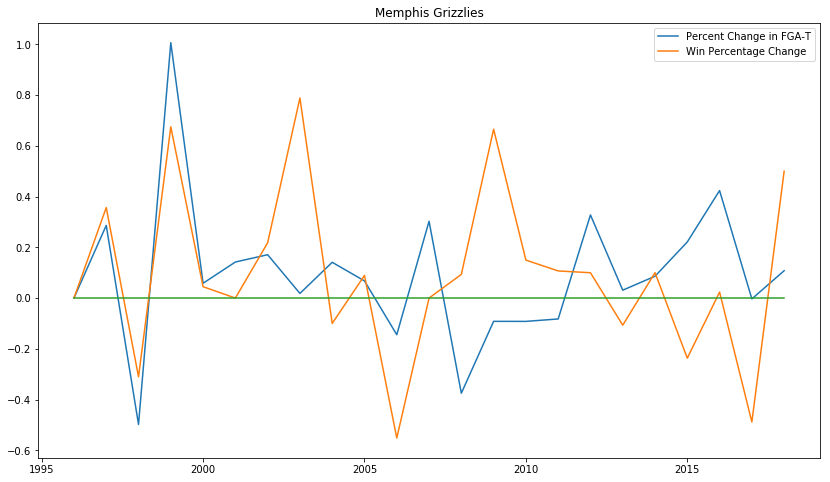

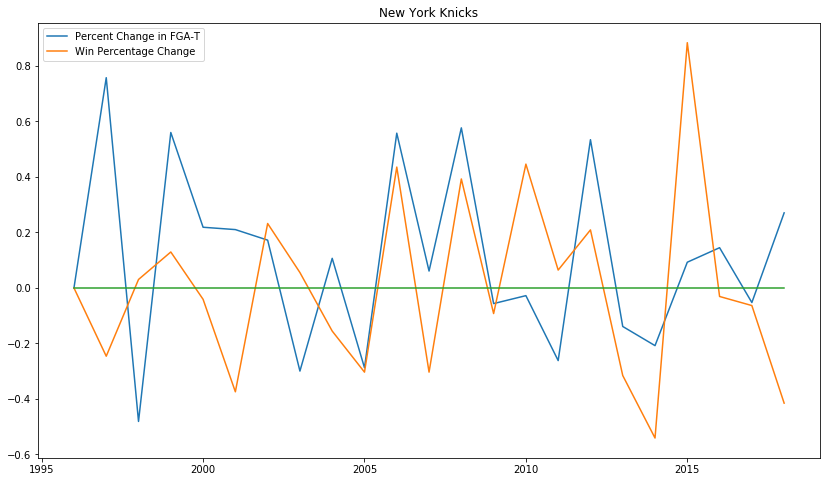

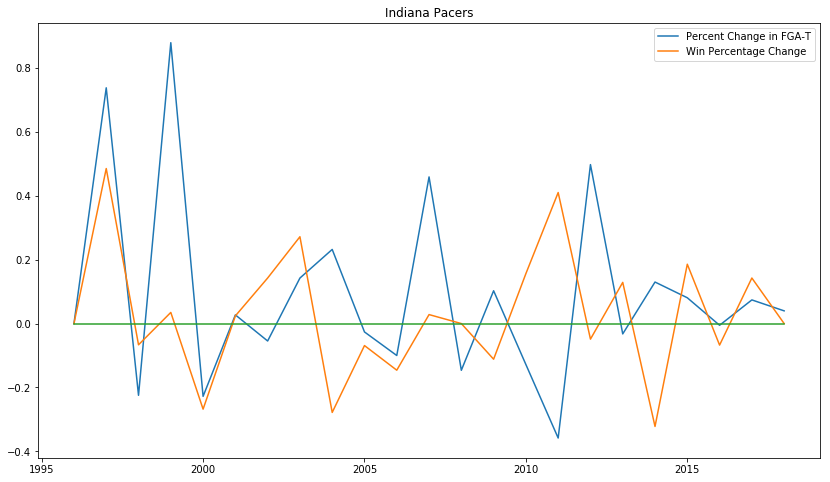

In [64]:
for team in team_dfs:
    plt.figure(figsize=(14,8))
    plt.plot(team['YEAR'], team['dFGA-T'], label='Percent Change in FGA-T')
    plt.plot(team['YEAR'], team['dWin%'], label = 'Win Percentage Change')
    plt.plot(team['YEAR'], [0]*23)
    plt.title(team.loc[0]['TEAM'])
    plt.legend()
    plt.show()

In [68]:
for team in team_dfs:
    ax = sns.countplot(x = team['YEAR'],  data=team)

ValueError: Could not interpret input 'who'

Now scatter plot win rate change vs percent change in FGA-T for every team across all years

In [165]:
#now team_dfs will contain all teams
team_dfs = []
teams_list = final_df['TEAM'].unique().tolist()

#so we split up the big original dataframe by team and put it into a list of teams
for i in teams_list:
    team_dfs.append(final_df[final_df['TEAM'] == i])

for i, team in enumerate(team_dfs):
    team_dfs[i] = team.set_index(np.arange(team.shape[0]))

In [166]:
#now we should calculate delS_A and delS_W for every team and add each as a column
for i, team in enumerate(team_dfs):
    #now calculate change in three pointers each year
    delS_A = []
    for index, row in team.iterrows():
        if index-1 == -1:
            pass
        else:
            del_Si = (team.loc[index]['FGA-T'] - team.loc[index-1]['FGA-T'])/(team.loc[index-1]['FGA-T'])
            delS_A.append(del_Si)
    #insert dummy 0 at start of list to represent the fact that year 1996 is our baseline
    delS_A.insert(0,0)
    team_dfs[i]['dFGAT'] = delS_A

for i, team in enumerate(team_dfs):
    #now calculate change in win rate each year
    delS_W = []
    for index, row in team.iterrows():
        if index-1 == -1:
            pass
        else:
            del_Si = (team.loc[index]['W/L%'] - team.loc[index-1]['W/L%'])/(team.loc[index-1]['W/L%'])
            delS_W.append(del_Si)
    #insert dummy 0 at start of list to represent the fact that year 1996 is our baseline
    delS_W.insert(0,0)
    team_dfs[i]['dWinPer'] = delS_W


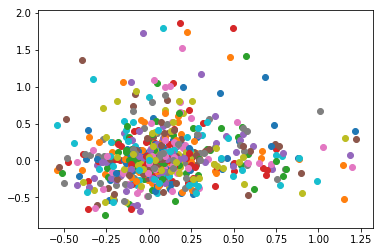

In [167]:
for team in team_dfs:
    plt.scatter(team['dFGAT'], team['dWinPer'])

In [171]:
#fit linreg
linreg_df = pd.concat(team_dfs)
outcome_1, predictors_1 = patsy.dmatrices('dWinPer ~ dFGAT', linreg_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                dWinPer   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     8.847
Date:                Sun, 02 Jun 2019   Prob (F-statistic):            0.00304
Time:                        18:30:51   Log-Likelihood:                -251.58
No. Observations:                 682   AIC:                             507.2
Df Residuals:                     680   BIC:                             516.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0396      0.014      2.803      0.0

i.e. %change in three point shots predicts %change in win rate with p-value 0.003

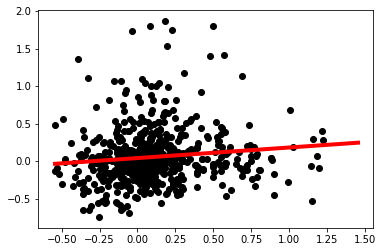

In [179]:
plt.scatter(linreg_df['dFGAT'],linreg_df['dWinPer'], c='k')
xs = np.arange(linreg_df['dFGAT'].min(), linreg_df['dWinPer'].max())
ys = 0.1407 * xs + 0.0396
plt.plot(xs, ys, 'r', linewidth=4, label='Model')